# Day-Ahead Market Investigation

<br>

### Imports

In [41]:
## Importing standard modules
import pandas as pd
import numpy as np

from datetime import date, datetime, timedelta

import electric_insights_scraper as EI

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.transforms as mtf
import matplotlib.dates as mdates
from matplotlib.dates import HourLocator
from matplotlib.dates import DateFormatter

<br>

### Reading in Data

In [42]:
df_EI = pd.read_csv('data/EI.csv', parse_dates=['local_datetime'], index_col='local_datetime')
df_EI.index = df_EI.index.tz_localize('UTC').tz_convert('Europe/London')
df_EI.head()

,day_ahead_price,SP,imbalance_price,temperature,gCO2_per_kWh,TCO2_per_h,biomass,coal,demand,gas,...,nuclear,pumped_storage,solar,wind,dutch,french,irish,belgian,ireland,northern_ireland
local_datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00+00:00,58.05,1,74.74,-0.6,555.0,21278.0,0.0,17.650,38.329,11.900,...,6.973,-0.404,0.0,0.148,0.0,1.977,-0.161,0.0,0.0,0.0
2009-01-01 00:30:00+00:00,56.33,2,74.89,-0.6,558.0,21442.0,0.0,17.770,38.461,12.031,...,6.968,-0.527,0.0,0.157,0.0,1.977,-0.160,0.0,0.0,0.0
2009-01-01 01:00:00+00:00,52.98,3,76.41,-0.6,569.0,21614.0,0.0,18.070,37.986,11.754,...,6.970,-1.018,0.0,0.147,0.0,1.977,-0.160,0.0,0.0,0.0
2009-01-01 01:30:00+00:00,50.39,4,37.73,-0.6,578.0,21320.0,0.0,18.022,36.864,11.162,...,6.969,-1.269,0.0,0.148,0.0,1.746,-0.160,0.0,0.0,0.0
2009-01-01 02:00:00+00:00,48.70,5,59.00,-0.6,585.0,21160.0,0.0,17.998,36.180,10.812,...,6.960,-1.566,0.0,0.160,0.0,1.730,-0.160,0.0,0.0,0.0


<br>

### Overview Plot

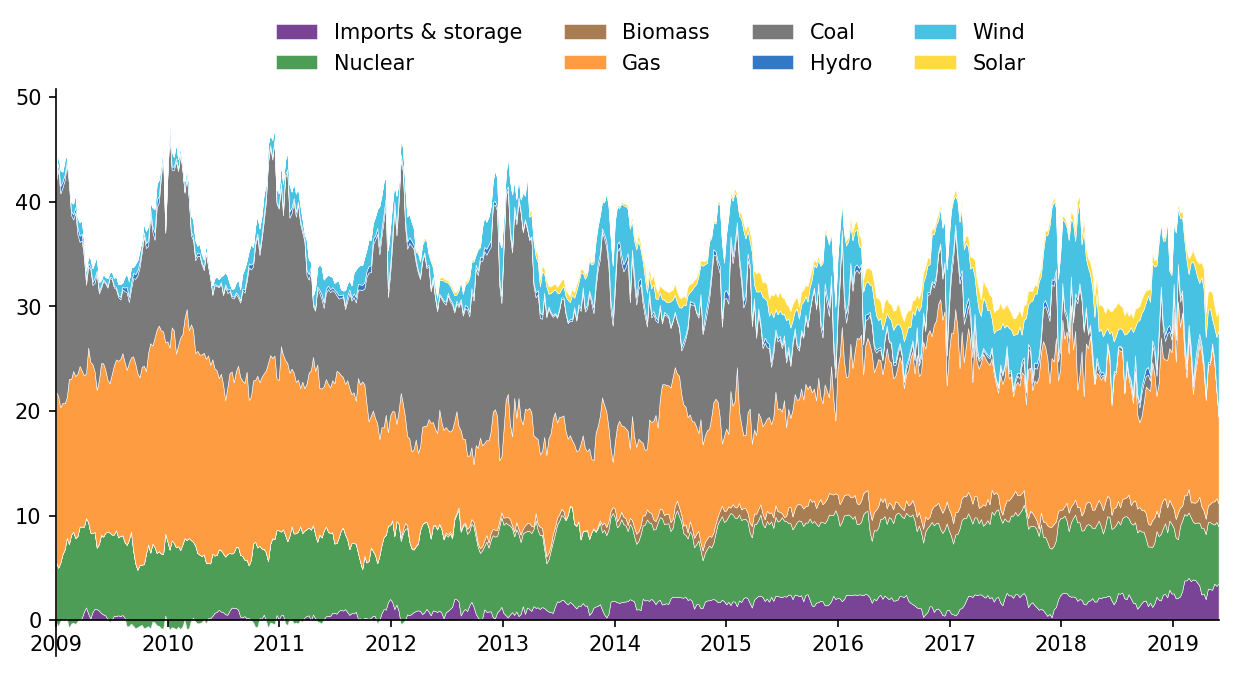

In [43]:
df_EI_resampled = EI.clean_df(df_EI)
EI.quick_plot(df_EI_resampled)

<br>

### Seasonal Price Variation

Wan't to see how the average daily export tariff varies across the months

In [10]:
df_DAM = df_EI[['day_ahead_price']]

df_DAM = df_DAM.assign(time=df_DAM.index.time)
df_DAM = df_DAM.assign(month=df_DAM.index.month)

df_DAM.head()

,day_ahead_price,time,month
local_datetime,,,
2009-01-01 00:00:00+00:00,58.05,00:00:00,1
2009-01-01 00:30:00+00:00,56.33,00:30:00,1
2009-01-01 01:00:00+00:00,52.98,01:00:00,1
2009-01-01 01:30:00+00:00,50.39,01:30:00,1
2009-01-01 02:00:00+00:00,48.70,02:00:00,1


<br>

### Transforming into Daily Average by Month

In [21]:
months = range(1, 13)
df_DAM_months = pd.DataFrame()

for month in months:
    df_DAM_month = df_DAM[df_DAM['month']==month]
    df_DAM_months[month] = df_DAM_month.groupby('time').mean()['day_ahead_price']
    
df_DAM_months.head()

,1,2,3,4,5,6,7,8,9,10,11,12
time,,,,,,,,,,,,
00:00:00,40.106657,38.948097,38.298416,35.947303,37.172412,37.802867,38.380710,36.579903,37.038867,36.894823,40.211633,40.508967
00:30:00,40.594868,39.528290,39.128563,34.848000,35.775015,36.117933,36.867258,35.184452,35.622200,35.648677,40.289833,41.035567
01:00:00,40.047155,39.385548,38.837061,35.264364,35.093333,34.973200,35.373290,33.751355,33.887067,35.482597,39.541333,40.190667
01:30:00,38.946745,38.035806,37.720182,35.912576,35.390000,34.486333,34.893419,33.298935,33.967133,35.775581,38.122267,38.686500
02:00:00,38.267625,37.381710,37.062278,35.542667,34.830059,33.947800,34.224452,32.764742,33.186600,35.210065,37.295067,37.773900


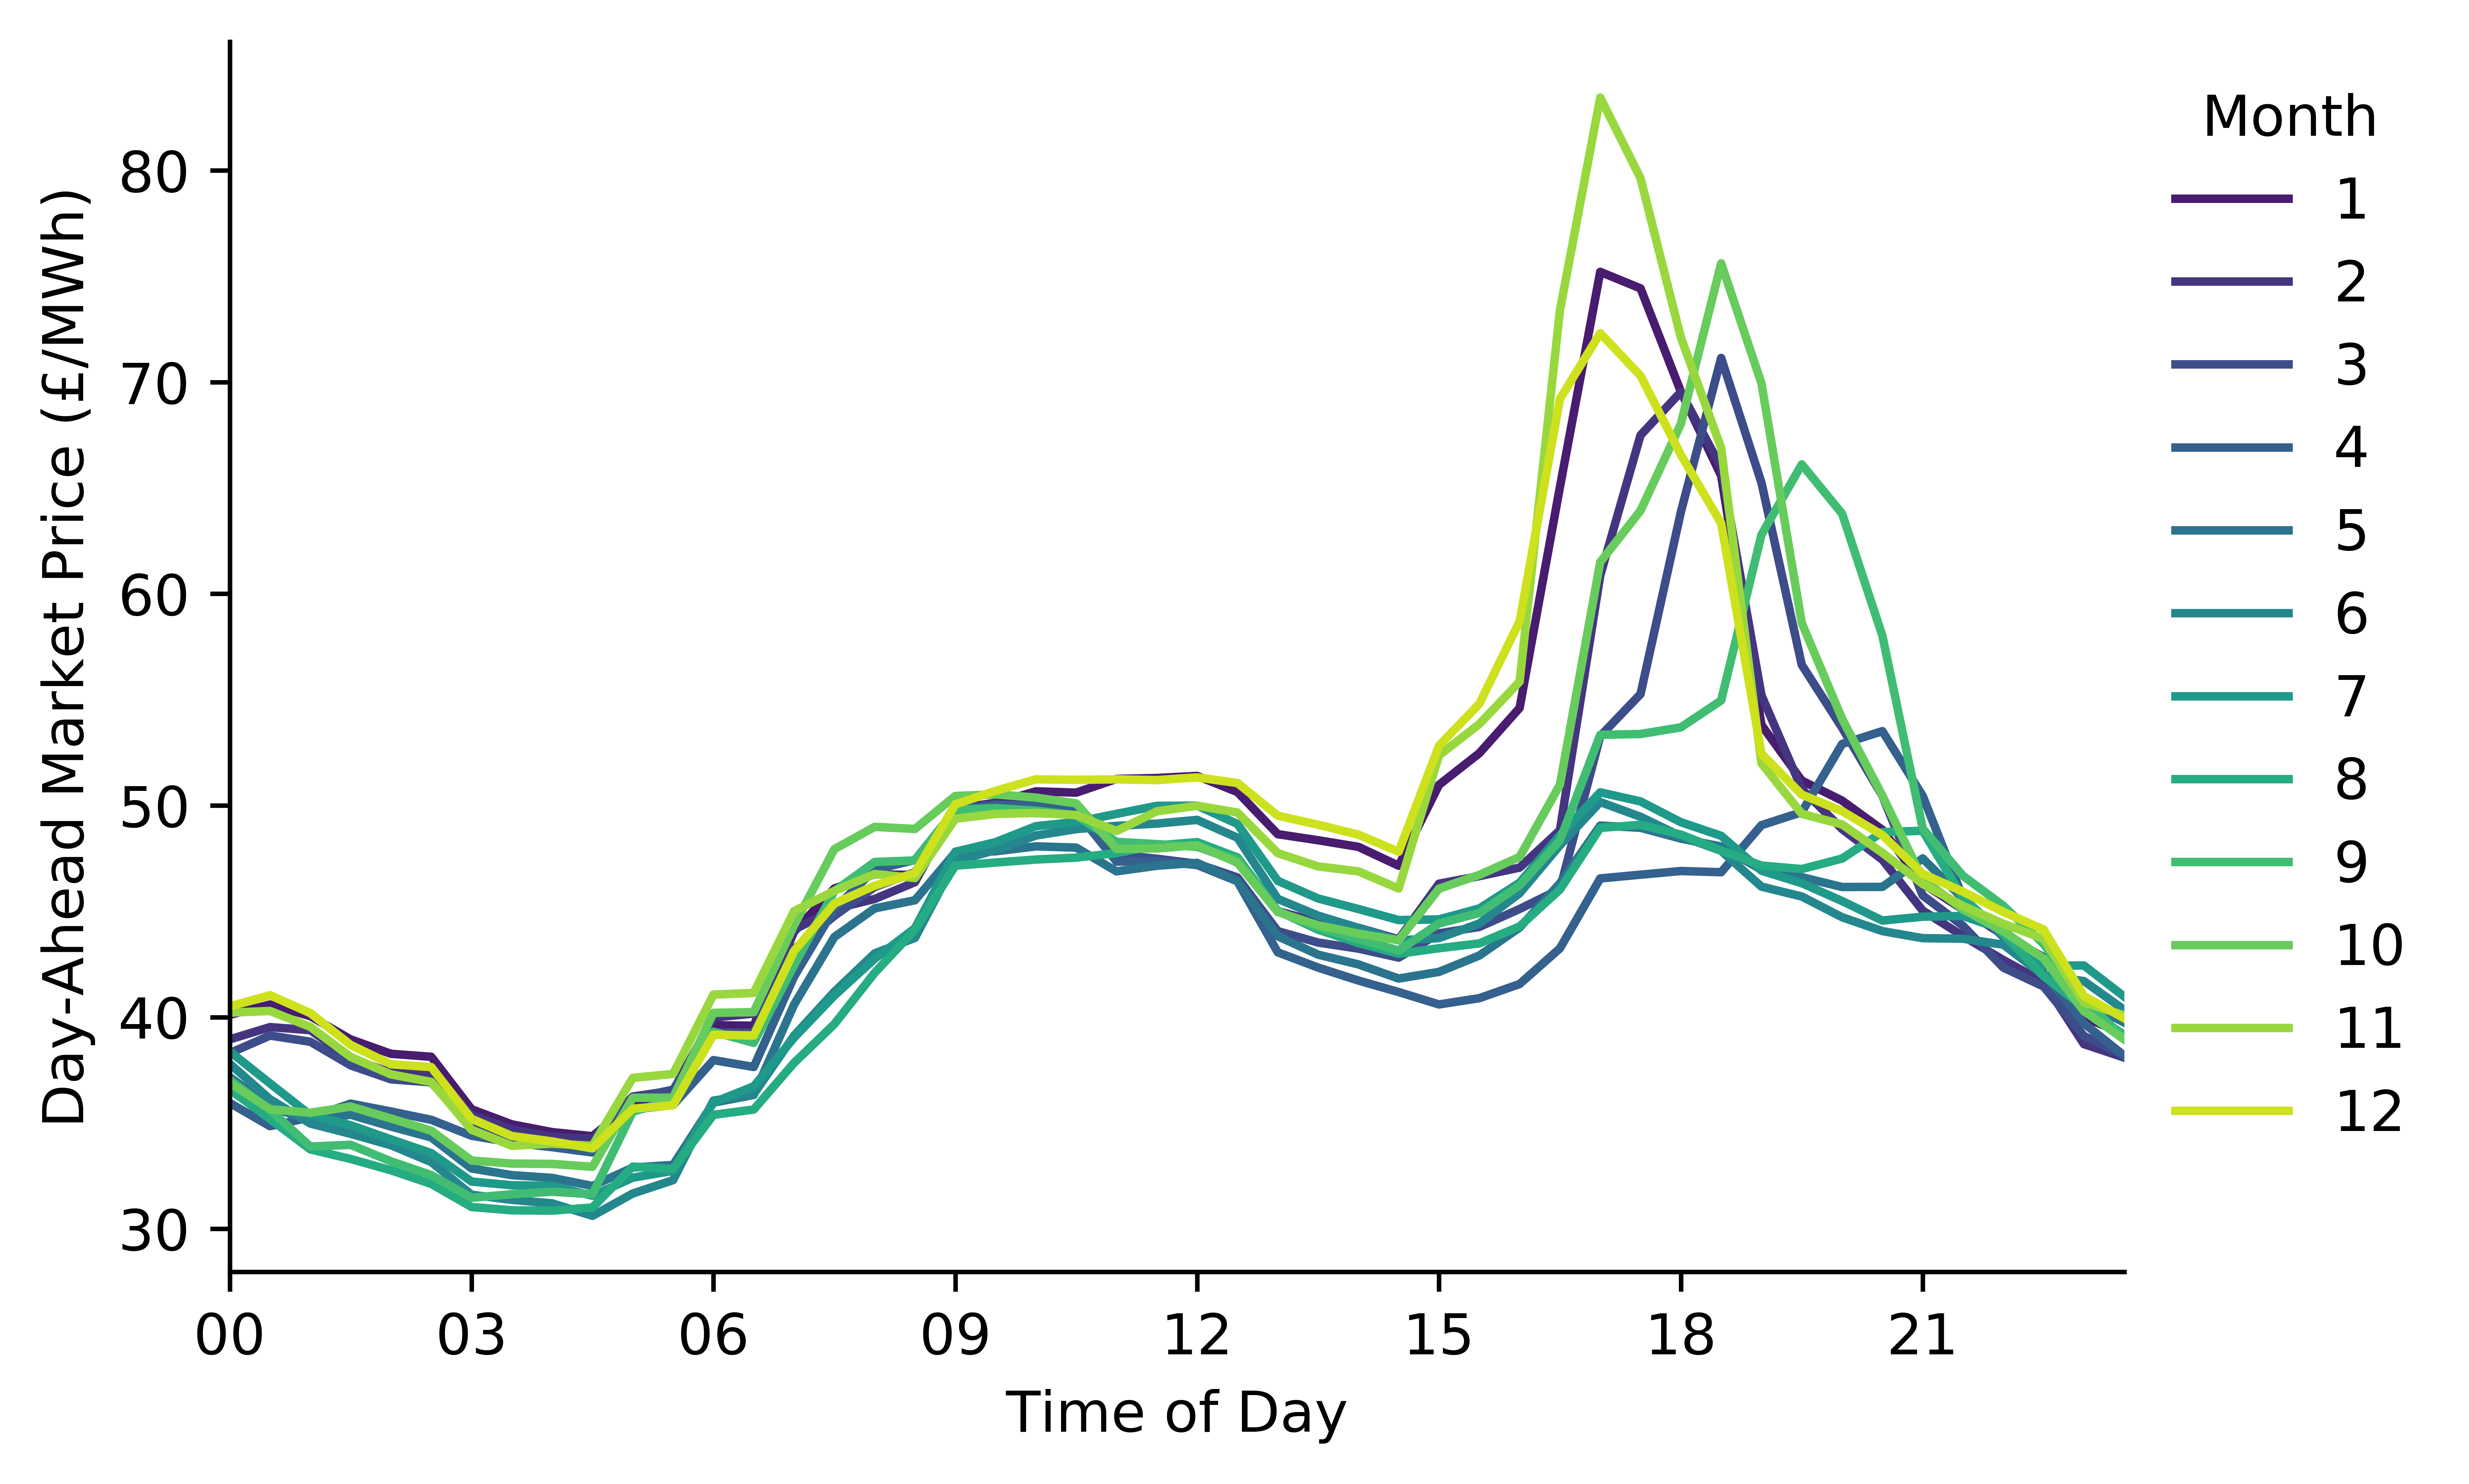

In [40]:
color_list = sns.color_palette("viridis", len(df_DAM_months.columns))
cmap = dict(zip(months, color_list))

d = date.today()
datetimes_format = [datetime.combine(d, x) for x in df_DAM_months.index]

plt.figure(dpi=150)
ax = plt.subplot()

for month in months:
    plt.plot(datetimes_format, df_DAM_months[month], label=f'{month}', color=cmap[month])

plt.xlabel('Time of Day')
plt.ylabel('Day-Ahead Market Price (£/MWh)')
fig.suptitle('Average Daily Profile')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(frameon=False, bbox_to_anchor=(1, 1), title='Month')

ax.xaxis.set_major_formatter(DateFormatter('%H'))
plt.xlim(datetimes_format[0], datetimes_format[-1])

#plt.savefig('img/daily_DAM_price_by_month.png')

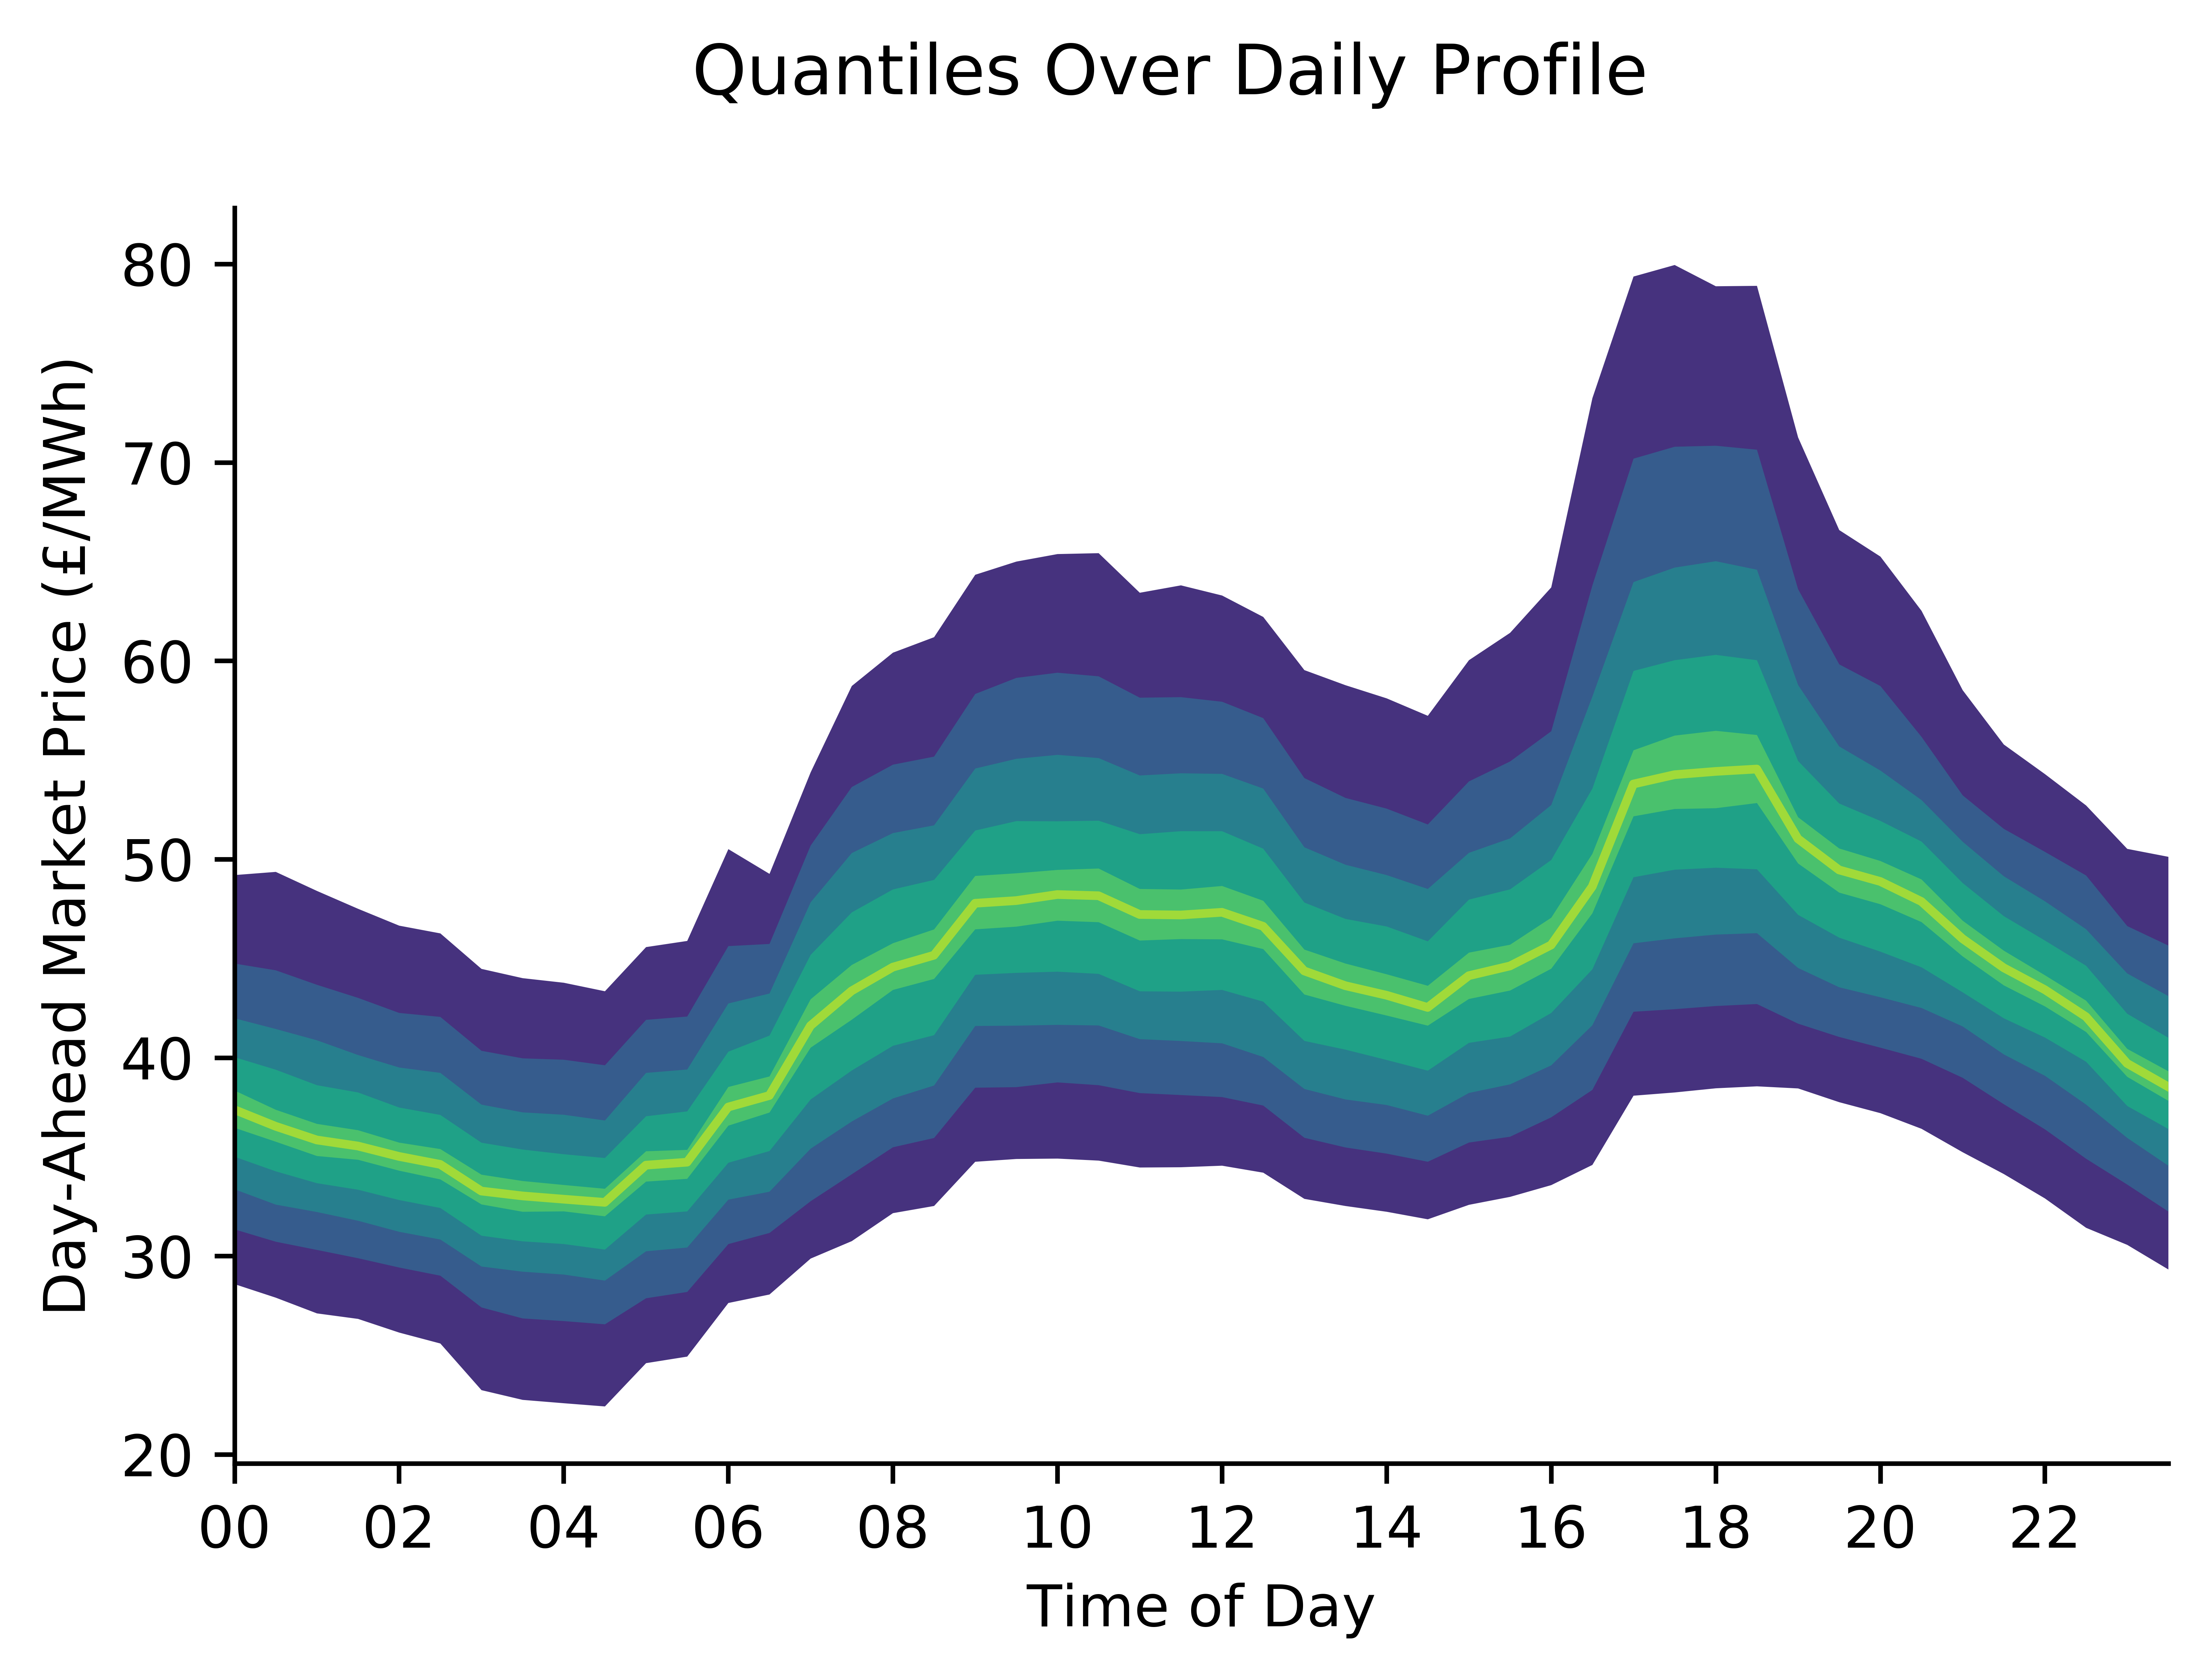

In [39]:
def hide_spines(ax, positions=['top', 'right']):
    """
    Pass a matplotlib axis and list of positions with spines to be removed
    
    args:
        ax:          Matplotlib axis object
        positions:   Python list e.g. ['top', 'bottom']
    """
    assert isinstance(positions, list), 'Position must be passed as a list '
    
    for position in positions:
        ax.spines[position].set_visible(False)

def clean_axis(ax, x, ylabel='Day-Ahead Market Price (£/MWh)', xlabel='Time of Day'):
    ## Labels and limits
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_xlim(pd.Series(x).min(), pd.Series(x).max())
    
    ## Dates
    hour_loc = mdates.HourLocator(interval=2)
    dt_fmt = mdates.DateFormatter('%H')
    
    ax.xaxis.set_major_locator(hour_loc)
    ax.xaxis.set_major_formatter(dt_fmt)

    ## Hiding spines
    hide_spines(ax)
    
    return ax 

def time_2_dt(x_time):
    my_day = date(2014, 7, 15)
    x_dt = [datetime.combine(my_day, t) for t in x_time]
    return x_dt
    
def calc_quantiles(df, value_col, groupby_col):
    alphas = list(np.linspace(0.1, 0.9, 10))
    quantiles = df[value_col].groupby(df[groupby_col]).quantile(alphas).unstack().values
    return alphas, quantiles

def plot_quantiles(df, value_col, groupby_col, x, ax=None, cmap='viridis'):
    if ax == None:
        fig = plt.figure()
        ax = plt.subplot()
        
    alphas, quantiles = calc_quantiles(df, value_col, groupby_col)
        
    num_quantiles = quantiles.shape[1]
    k = int(np.ceil(num_quantiles/2))
    palette = sns.color_palette(cmap, k+1)
    
    for i in range(k):
        ax.fill_between(x, quantiles[:,i], quantiles[:,num_quantiles-i-1],
                        linewidth=0, color=palette[i])
        
    ax.plot(x, df[value_col].groupby(df[groupby_col]).median(), color=palette[-1])
    return ax

x_time = pd.Series(df_DAM.index.time).unique()
x_dt = time_2_dt(x_time)

## Plotting
fig = plt.figure(dpi=150)
ax = plt.subplot()

ax = plot_quantiles(df_DAM, 'day_ahead_price', 'time', x_dt, ax=ax)
ax = clean_axis(ax, x_dt)

fig.suptitle('Quantiles Over Daily Profile')

#fig.savefig('img/daily_DAM_price_quantiles.png')